In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.clf()

raw_data = pd.read_csv("data/dataset_statistic.csv", sep=';')
print(raw_data)

    ID Pelanggan     Nama  Jenis Kelamin  Pendapatan Produk   Harga  Jumlah   \
0              1     Arif              1      600000      A  100000        4   
1              2     Dian              2     1200000      D  250000        4   
2              3    Dinda              2      950000      D  250000        3   
3              4    Fajar              1      400000      A  100000        2   
4              5      Ika              2     1200000      D  250000        4   
5              6    Ilham              1      800000      B  150000        4   
6              7    Indra              1      950000      B  150000        5   
7              8  Kartika              2     1100000      E  300000        3   
8              9  Lestari              2      800000      E  300000        2   
9             10      Lia              2     1700000      E  300000        5   
10            11    Maria              2      600000      A  100000        4   
11            12     Maya              2

<Figure size 640x480 with 0 Axes>

Menlihat hubungan antar variabel

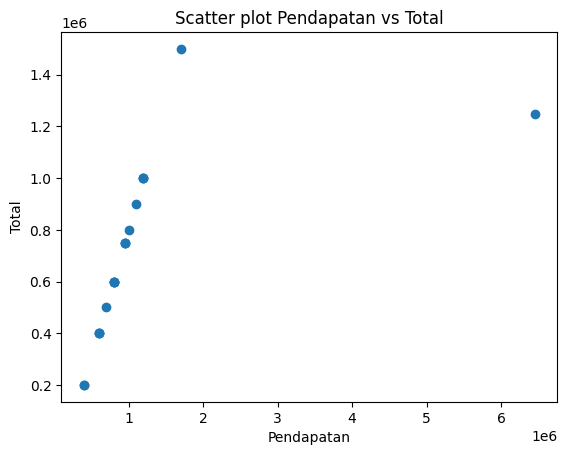

            Pendapatan     Total
Pendapatan    1.000000  0.592044
Total         0.592044  1.000000


In [15]:
plt.figure()
plt.scatter(raw_data['Pendapatan'], raw_data['Total'])
plt.xlabel('Pendapatan')
plt.ylabel('Total')
plt.title('Scatter plot Pendapatan vs Total')
plt.show()
df = raw_data[['Pendapatan', 'Total']].copy()
df['Total'] = df['Total'].astype(float)
print(df.corr())

Mengambil variabel 'Total' sebagai variabel tak bebas dan variabel 'Pendapatan' sebagai variabel bebas. Untuk menambahkan membentuk model yang disertai dengan intercept, kita harus menggunakan method .add_constant() untuk variabel bebas :

In [12]:
# Variabel tak bebas 
nilai_Y = raw_data[['Total']]

# variabel bebas
nilai_X = sm.add_constant(raw_data[['Pendapatan']])

gunakan method .OLS untuk membuat model regresi linier sederhana dengan memasukkan parameter endog=variabel_tak_bebas dan exog=variabel_bebas, disambung dengan method .fit():

In [13]:
# membuat model regresi linier 
model_regresi = sm.OLS(endog=nilai_Y, exog=nilai_X).fit()

# melihat hasil dari modeldengan menggunakan .summary()
print(model_regresi.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     9.714
Date:                Wed, 27 Aug 2025   Prob (F-statistic):            0.00596
Time:                        09:25:27   Log-Likelihood:                -277.92
No. Observations:                  20   AIC:                             559.8
Df Residuals:                      18   BIC:                             561.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.313e+05   8.43e+04      6.300      0.0